# Download dataset

In [ ]:
!pip install SoccerNet

In [ ]:
from SoccerNet.Downloader import SoccerNetDownloader as SNdl
mySNdl = SNdl(LocalDirectory="./data")
mySNdl.downloadDataTask(task="jersey-2023", split=["train","test","challenge"])

In [4]:
import torchvision.datasets as datasets
import torchvision.transforms as transforms
import torch

In [11]:
normalize = transforms.Normalize(mean=[0.485, 0.456, 0.406],
                                         std=[0.229, 0.224, 0.225])
train_dataset = datasets.ImageFolder(
        "testing/tiny-imagenet-200",
        transforms.Compose([
            transforms.RandomResizedCrop(32),
            transforms.RandomHorizontalFlip(),
            transforms.ToTensor(),
            normalize,
        ]))

train_loader = torch.utils.data.DataLoader(
        train_dataset, batch_size=64, shuffle=True,
        num_workers=1, pin_memory=True)

In [12]:
a = next(iter(train_loader))   
a[0].shape, a[1].shape

(torch.Size([64, 3, 32, 32]), torch.Size([64]))

# Testing

In [55]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [56]:
import torch
from model.mnist_network import MnistPadding
import torchvision
from torchvision import transforms
from torchvision.io import read_image
import matplotlib.pyplot as plt

device = "cuda" if torch.cuda.is_available() else "cpu"

In [3]:
model = MnistPadding().to(device)  # B, C, 210, 210

ckpt = torch.load("mnist/mnist_model_padding_ckpt_E9.pth")
model.load_state_dict(ckpt['model_state_dict'])


<All keys matched successfully>

In [4]:
transform = transforms.Compose([

    # transforms.CenterCrop(26),
    # transforms.Resize((150,150)),
    # transforms.Resize((250, 250)),
    # transforms.Pad(80),
    transforms.ColorJitter(brightness=0.05, contrast=0.05, saturation=0.05, hue=0.05),
    transforms.Grayscale(1),
    # transforms.RandomRotation(10),      
    # transforms.RandomAffine(5),
    # transforms.RandomPerspective(distortion_scale=0.65, p=0.8),
    # transforms.ElasticTransform(),
    # transforms.GaussianBlur(kernel_size=(3,3)),
    transforms.Resize((200,200)),

    # convert the image to a pytorch tensor
    # transforms.ToTensor(), 

# # normalise the images with mean and std of the dataset
# transforms.Normalize((0.1307,), (0.3081,)) 
])

(<matplotlib.image.AxesImage at 0x795df69c3910>, torch.Size([3, 105, 39]))

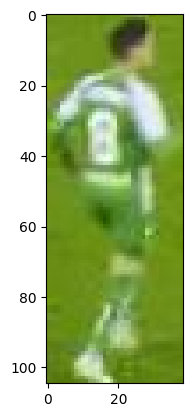

In [52]:
img_dir = "data/jersey-2023/train/images/6/6_350.jpg"   # 8
# img_dir = "data/jersey-2023/train/images/9/9_51.jpg"    # -1
# img_dir = "data/jersey-2023/train/images/2/2_8.jpg"   #   27
# img_dir = "data/jersey-2023/train/images/6/6_345.jpg"  # 8
# img_dir = "data/jersey-2023/train/images/10/10_26.jpg"  # 3
# img_dir = "data/jersey-2023/train/images/20/20_201.jpg"  # 4

ori_img = read_image(img_dir)
plt.imshow(ori_img.permute(1,2,0)), ori_img.shape

(torch.Size([1, 200, 200]), torch.float32, device(type='cuda', index=0))

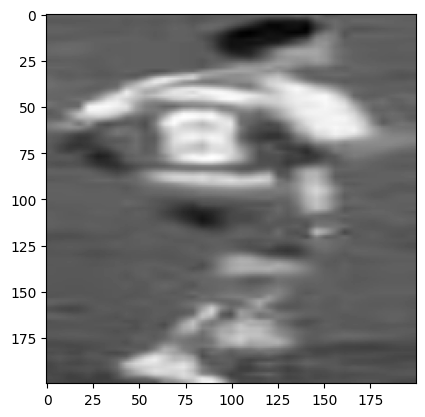

In [53]:
img_dir = "data/jersey-2023/train/images/6/6_350.jpg"   # 8
# img_dir = "data/jersey-2023/train/images/9/9_51.jpg"    # -1
# img_dir = "data/jersey-2023/train/images/2/2_8.jpg"   #   27
# img_dir = "data/jersey-2023/train/images/6/6_345.jpg"  # 8
# img_dir = "data/jersey-2023/train/images/10/10_26.jpg"  # 3
# img_dir = "data/jersey-2023/train/images/20/20_201.jpg"  # 4

ori_img = read_image(img_dir)
img = transform(ori_img)
img = img.float()
plt.imshow(img.permute(1,2,0), cmap='gray')
img = img.to(device)
img.shape, img.dtype, img.device

In [54]:

model.eval()
with torch.no_grad():
    output = model(img.unsqueeze(0))
    pred = output.argmax(dim=1, keepdim=True)
    print(output)
    print(pred)

tensor([[-316.2349, -787.7780, -322.0289, -458.9216, -224.8711, -299.7875,
         -272.8350, -516.2353,    0.0000, -303.0577]], device='cuda:0')
tensor([[8]], device='cuda:0')


In [57]:
from model.mnist_network import MnistDistorted28

mnist_distorted28 = MnistDistorted28()

ckpt = torch.load("mnist/mnist_model_distored28_ckpt_E99.pth")
mnist_distorted28.load_state_dict(ckpt['model_state_dict'])
mnist_distorted28.to(device)


MnistDistorted28(
  (conv11): Conv2d(1, 16, kernel_size=(3, 3), stride=(1, 1))
  (conv12): Conv2d(1, 16, kernel_size=(5, 5), stride=(1, 1))
  (conv13): Conv2d(1, 16, kernel_size=(7, 7), stride=(1, 1))
  (conv14): Conv2d(1, 16, kernel_size=(9, 9), stride=(1, 1))
  (conv21): Conv2d(16, 32, kernel_size=(3, 3), stride=(1, 1))
  (conv22): Conv2d(16, 32, kernel_size=(5, 5), stride=(1, 1))
  (conv23): Conv2d(16, 32, kernel_size=(7, 7), stride=(1, 1))
  (conv24): Conv2d(16, 32, kernel_size=(9, 9), stride=(1, 1))
  (conv31): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1))
  (conv32): Conv2d(32, 64, kernel_size=(5, 5), stride=(1, 1))
  (conv33): Conv2d(32, 64, kernel_size=(7, 7), stride=(1, 1))
  (conv34): Conv2d(32, 64, kernel_size=(9, 9), stride=(1, 1))
  (maxpool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (dropout1): Dropout(p=0.25, inplace=False)
  (dropout2): Dropout(p=0.5, inplace=False)
  (fc11): Linear(in_features=7744, out_features=256, bias=True)
 

(torch.Size([1, 50, 50]), torch.float32, device(type='cuda', index=0))

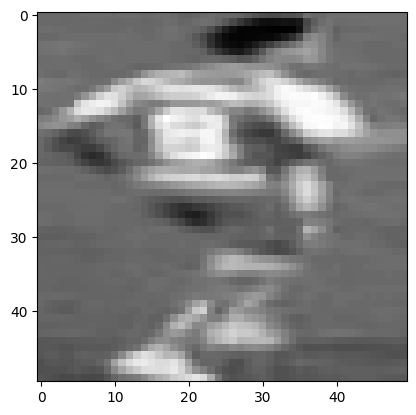

In [63]:
transform = transforms.Compose([

    # transforms.CenterCrop(50),
    # transforms.Resize((150,150)),
    # transforms.Resize((250, 250)),
    # transforms.Pad(80),
    transforms.ColorJitter(brightness=0.05, contrast=0.05, saturation=0.05, hue=0.05),
    transforms.Grayscale(1),
    # transforms.RandomRotation(10),      
    # transforms.RandomAffine(5),
    # transforms.RandomPerspective(distortion_scale=0.65, p=0.8),
    # transforms.ElasticTransform(),
    # transforms.GaussianBlur(kernel_size=(3,3)),
    transforms.Resize((50,50)),

    # convert the image to a pytorch tensor
    # transforms.ToTensor(), 

# # normalise the images with mean and std of the dataset
# transforms.Normalize((0.1307,), (0.3081,)) 
])
img_dir = "data/jersey-2023/train/images/6/6_350.jpg"   # 8
# img_dir = "data/jersey-2023/train/images/9/9_51.jpg"    # -1
# img_dir = "data/jersey-2023/train/images/2/2_8.jpg"   #   27
# img_dir = "data/jersey-2023/train/images/6/6_345.jpg"  # 8
# img_dir = "data/jersey-2023/train/images/10/10_26.jpg"  # 3
# img_dir = "data/jersey-2023/train/images/20/20_201.jpg"  # 4

ori_img = read_image(img_dir)
img = transform(ori_img)
img = img.float()
plt.imshow(img.permute(1,2,0), cmap='gray')
img = img.to(device)
img.shape, img.dtype, img.device

In [64]:
mnist_distorted28.eval()
with torch.no_grad():
    output = mnist_distorted28(img.unsqueeze(0))
    pred = output.argmax(dim=1, keepdim=True)
    print(output)
    print(pred)

RuntimeError: shape '[-1, 4096]' is invalid for input of size 23104